In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import pandas as pd
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import skimage
from skimage.transform import resize
import tensorflow as tf
import os
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tqdm import tqdm
import cv2
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split




train_dir = "/content/drive/MyDrive/dataset4/asl_alphabet_train/"
# test_dir =  "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/"


train_len = 87000
image_size=50

def get_data(folder):
    X = np.empty((train_len, image_size, image_size, 3), dtype = np.float32)
    y = np.empty((train_len), dtype = int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 3))
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y


letters, labels= get_data(train_dir)

print("The shape of letters is : ", letters.shape)

100%|██████████| 734/734 [00:12<00:00, 57.92it/s] 

The shape of letters is :  (87000, 50, 50, 3)


In [ ]:
label_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
               'O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

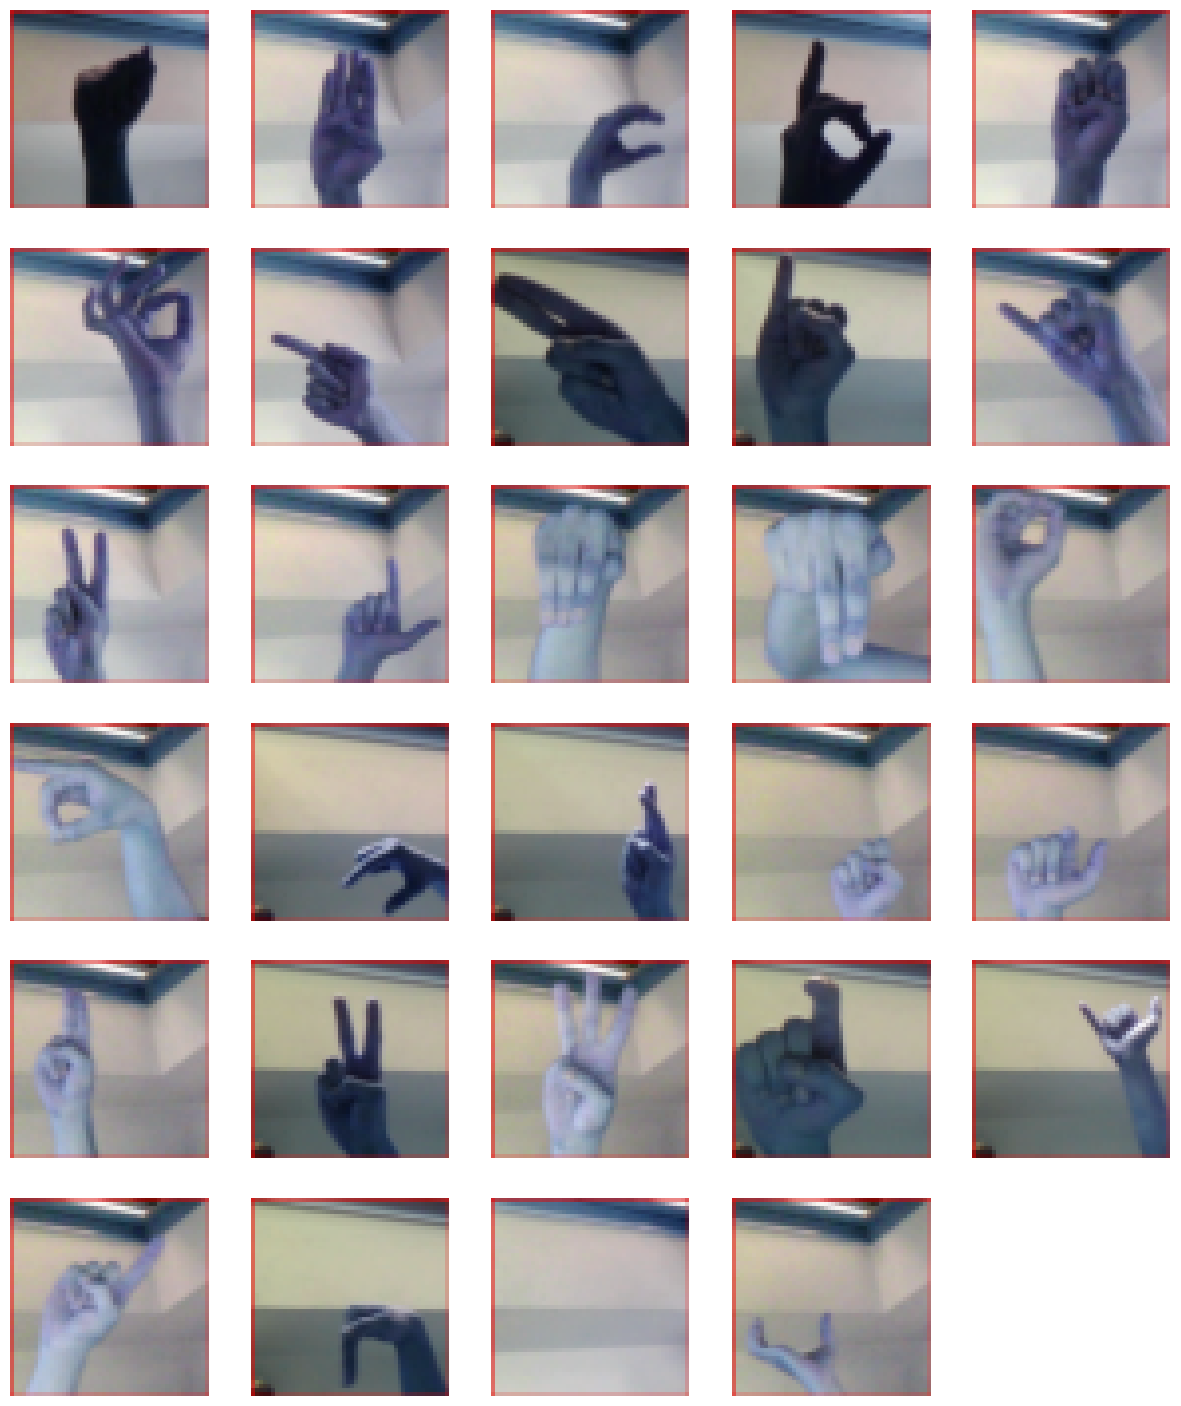

In [ ]:
def plot_letter(letter):
    if letter.shape != (50, 50, 3):
        letter = letter.reshape(50, 50, 3)
    plt.imshow(letter)
    plt.axis('off')


def plot_letters(letters, cols=4):
    letters = np.array(letters)
    if len(letters.shape) == 1:
        letters = letters[None, :]
    m = letters.shape[0]

    rows = m // cols
    if m % cols != 0:
        rows += 1
    fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
    if len(axes.shape) == 1:
        axes = axes[None, :]

    for i in range(rows):
        for j in range(cols):
            try:
                plt.sca(axes[i, j])  # set current axes
                letter = letters[i * cols + j]  # get letter
            except IndexError:
                plt.axis('off')
                continue
            plot_letter(letter)
    return fig, axes


_, idx = np.unique(labels, return_index=True)
plot_letters(letters[idx], cols=5)
for i in range(29):
    plt.subplot(6,5,i+1)
    plt.xlabel(label_names[i])

In [ ]:
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(letters, labels, test_size=0.3, random_state=42, stratify=labels)

X_valid, X_train = X_train[:20000] / 255., X_train[20000:] / 255.
y_valid, y_train = y_train[:20000], y_train[20000:]
X_test = X_test / 255.
print("The shape of X_test is : ", X_test.shape)
print("The shape of X_train is : ", X_train.shape)



The shape of X_test is :  (26100, 50, 50, 3)
The shape of X_train is :  (40900, 50, 50, 3)


In [ ]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,n_estimators=100, oob_score=True)
model.fit(x_train2,y_train)

y_pred=model.predict(x_test2)
y_pred

array([21, 25, 21, ...,  0,  0,  0])

In [ ]:
accuracy_score(y_test, y_pred)

0.9980459770114942

In [ ]:
label_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
               'O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']



img_path='/content/K_test.jpg'

img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(50,50))

#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

classes = ["A","B","C","D","E","F","G","H","I","J", "K", "L", "M" "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "nothing", "space"]

ans=model.predict(img_arr2)

print(label_names[ans[0]])

K


In [ ]:
import joblib

In [ ]:
joblib.dump(model, "rf_model.joblib")

['rf_model.joblib']